<h1><center>ESTIMATION THEORY</center></h1>

### Topics
- Estimation <br>
- What does Estimation offer? <br> 
- Elements of Estimation <br> 
- Properties of Good Estimator <br> 
- Estimation methods <br> 
- Maximum likelihood estimation(MLE) <br> 
- Examples

# What is Estimation?

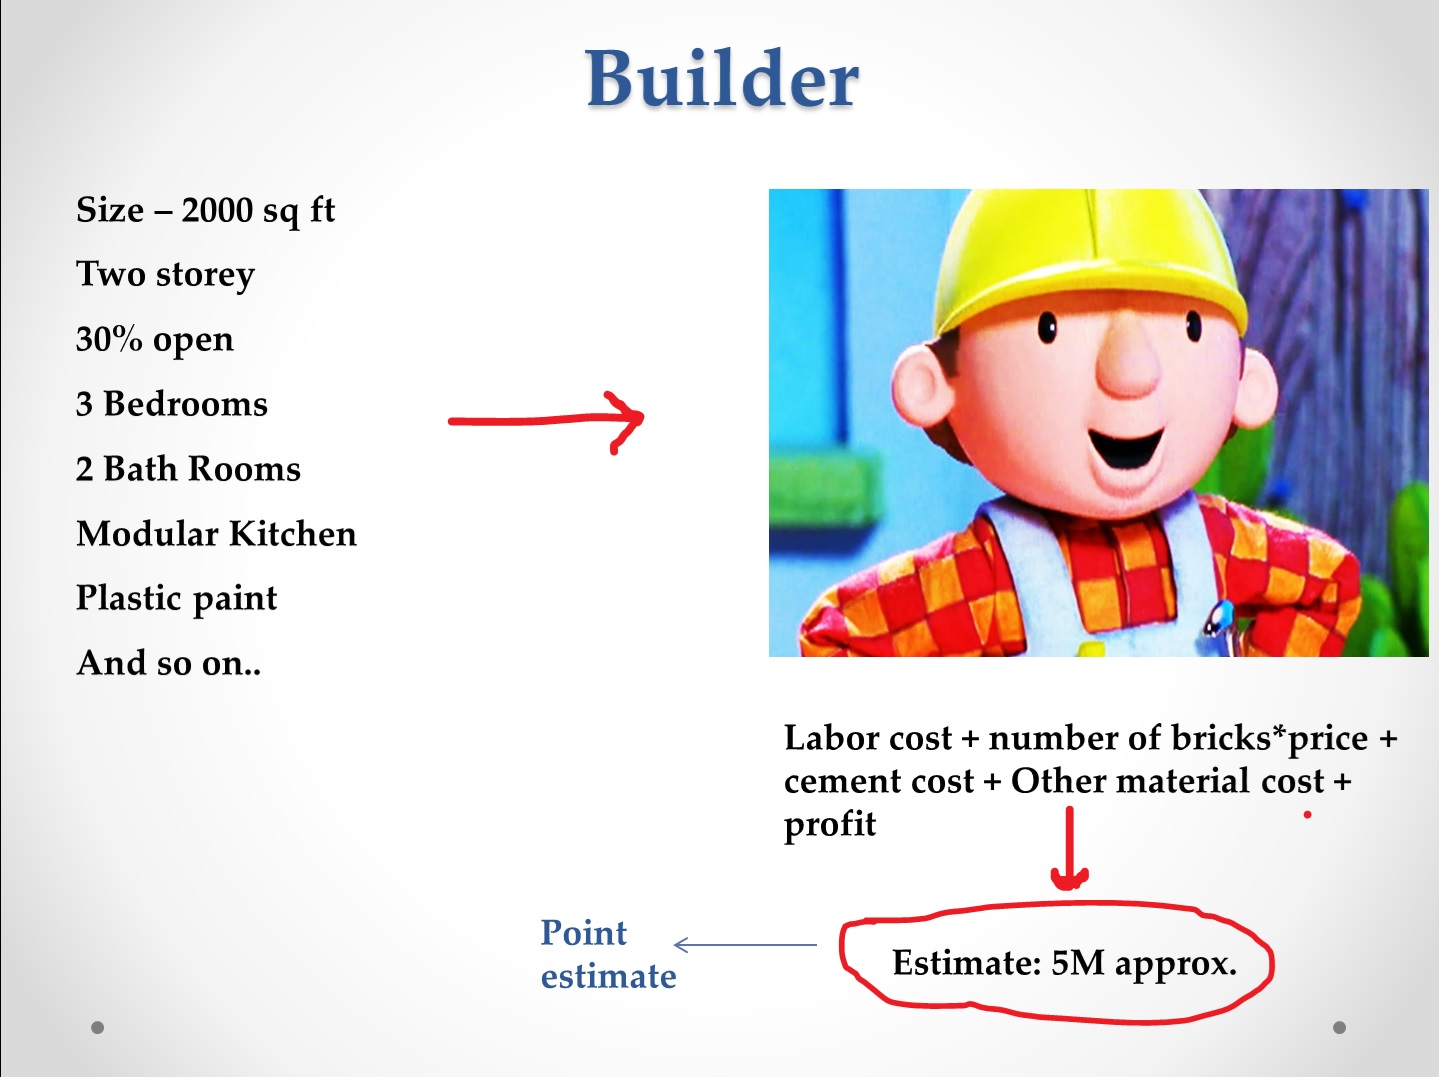

### Definition 
Estimation is a process of "Estimating" the properties of the population from which data is collected.
And the objective of Estimation is the determine the approximate value of a population parameter basis on a sample statistic.


### What estimation offers?
Methods for estimation the unknowns <br> Assessing the goodness estimates. <br> Making confidence statment about the true values.

## How it works?
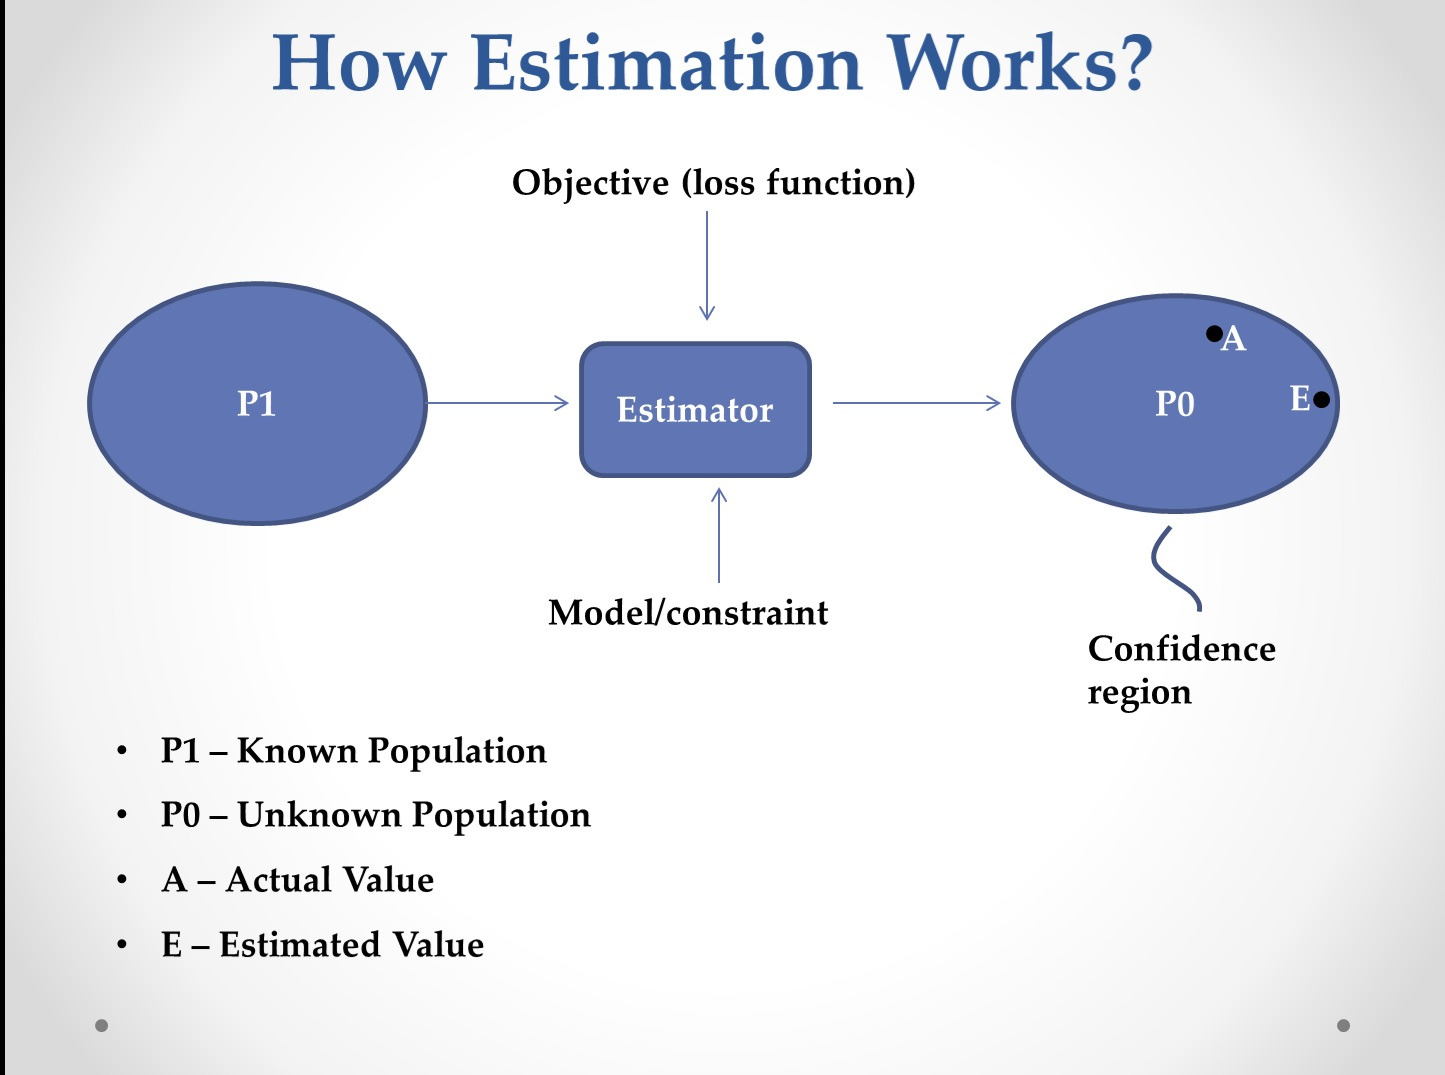

## Properties of a good Estimator

- Unbiased <br>
- Minimum Variance<br>
- Efficiency<br>
- Mean square Error(MSE)<br>
- Distribtuion of Error

## Unbiased
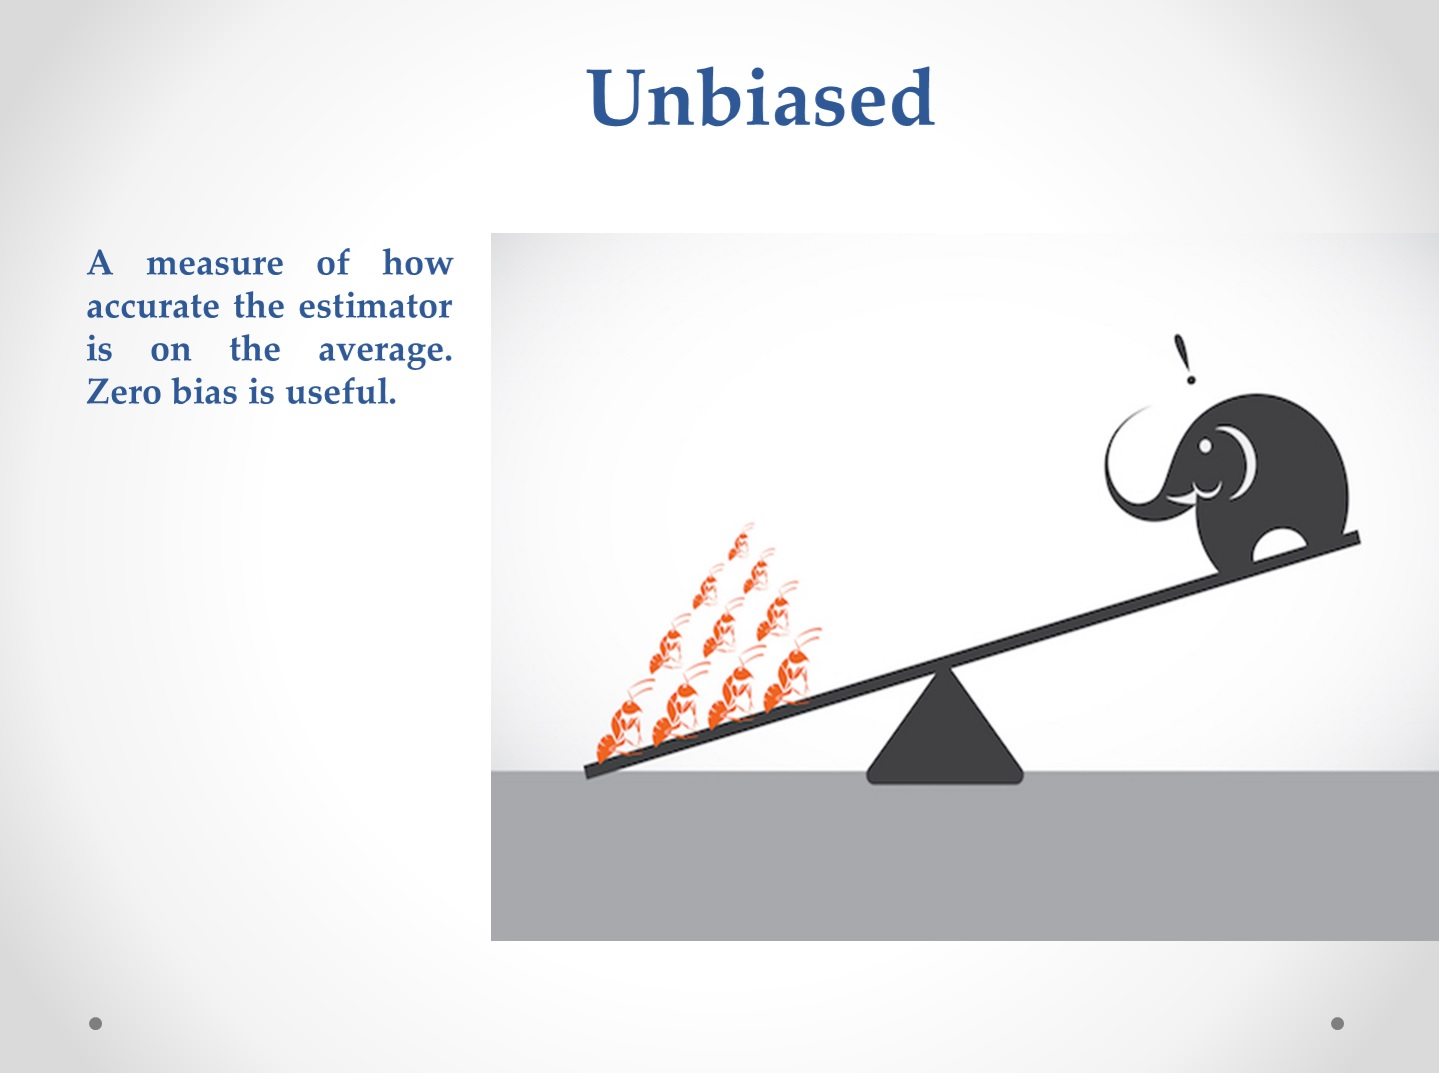

## Minimum variance
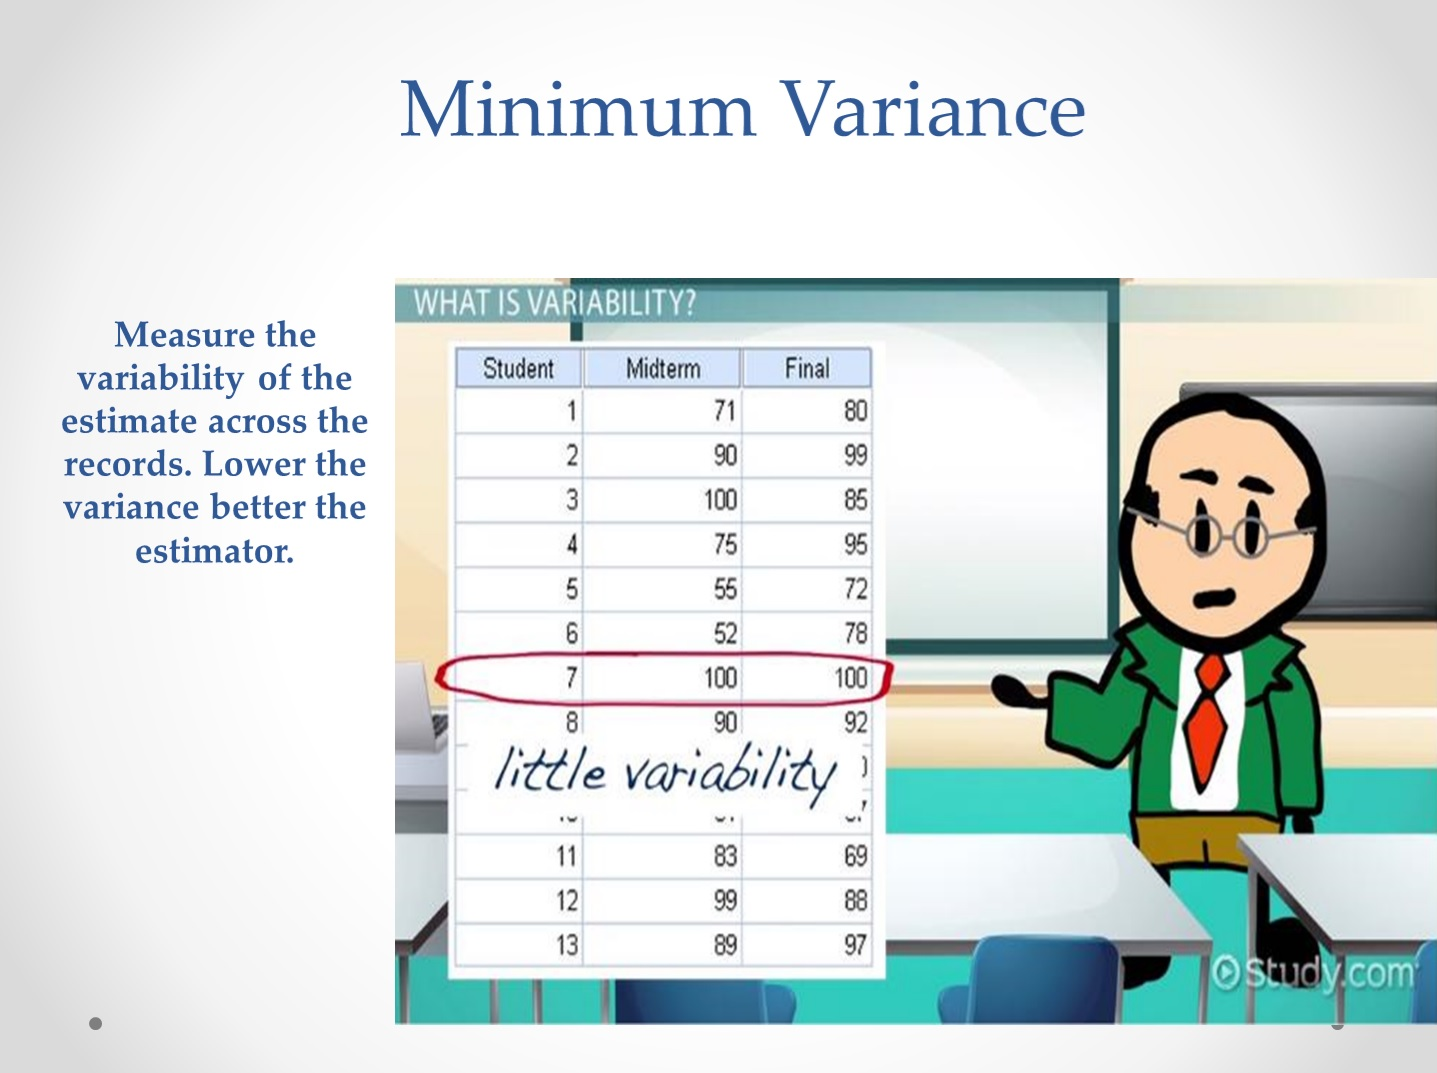

## Efficiency 
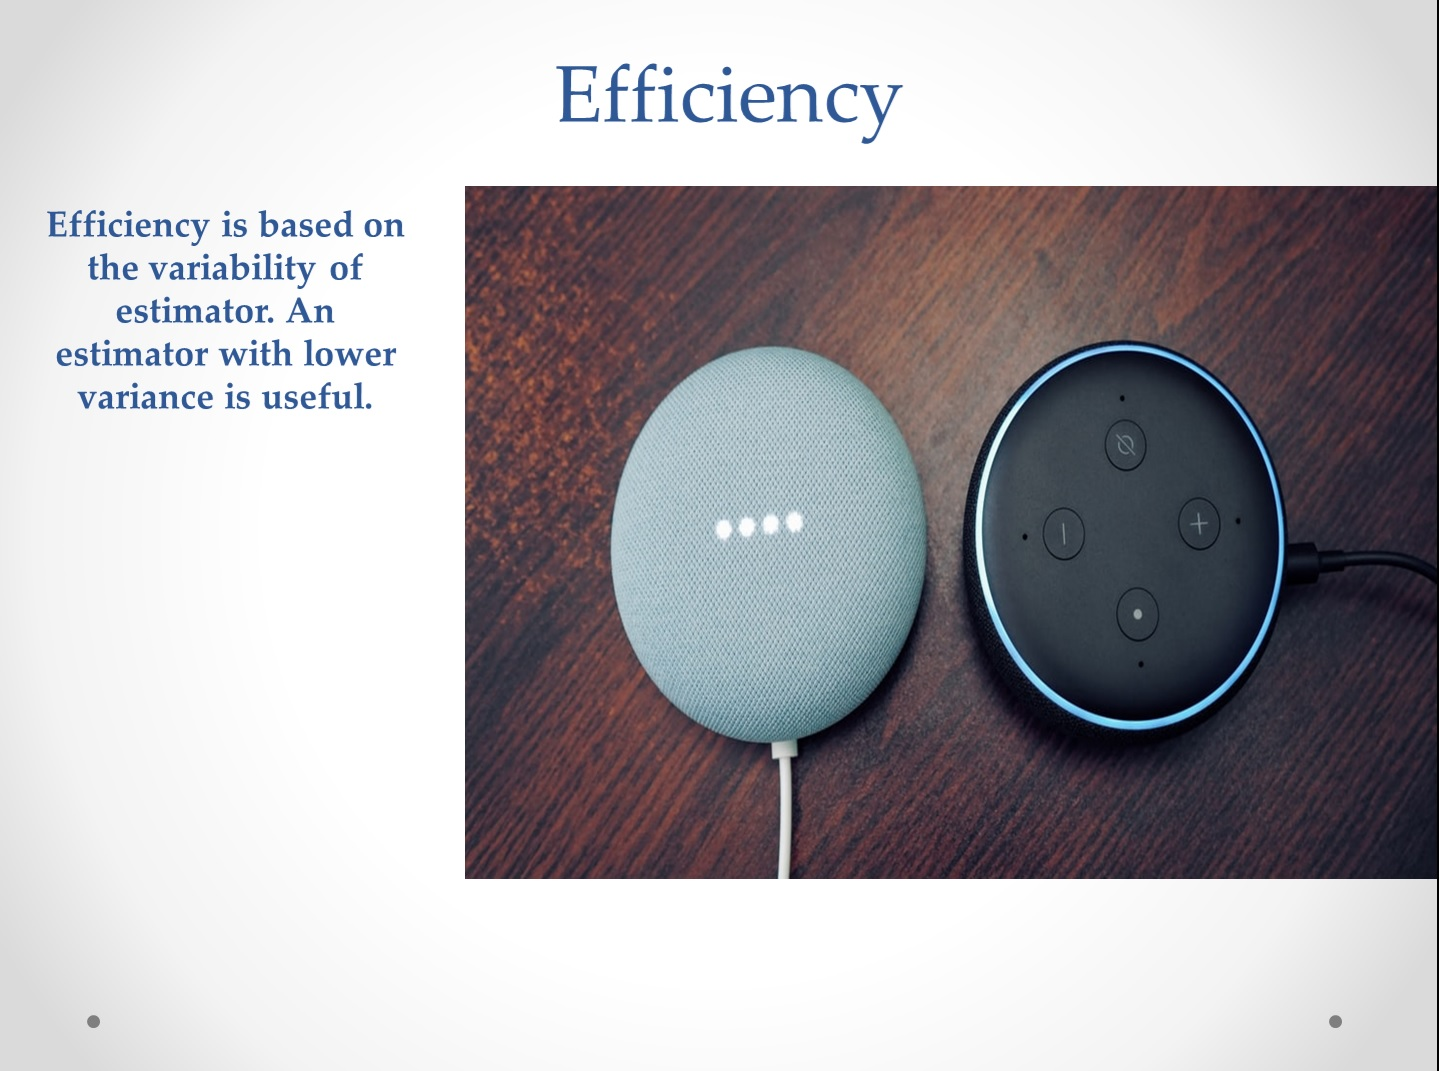

## Mean Square Error
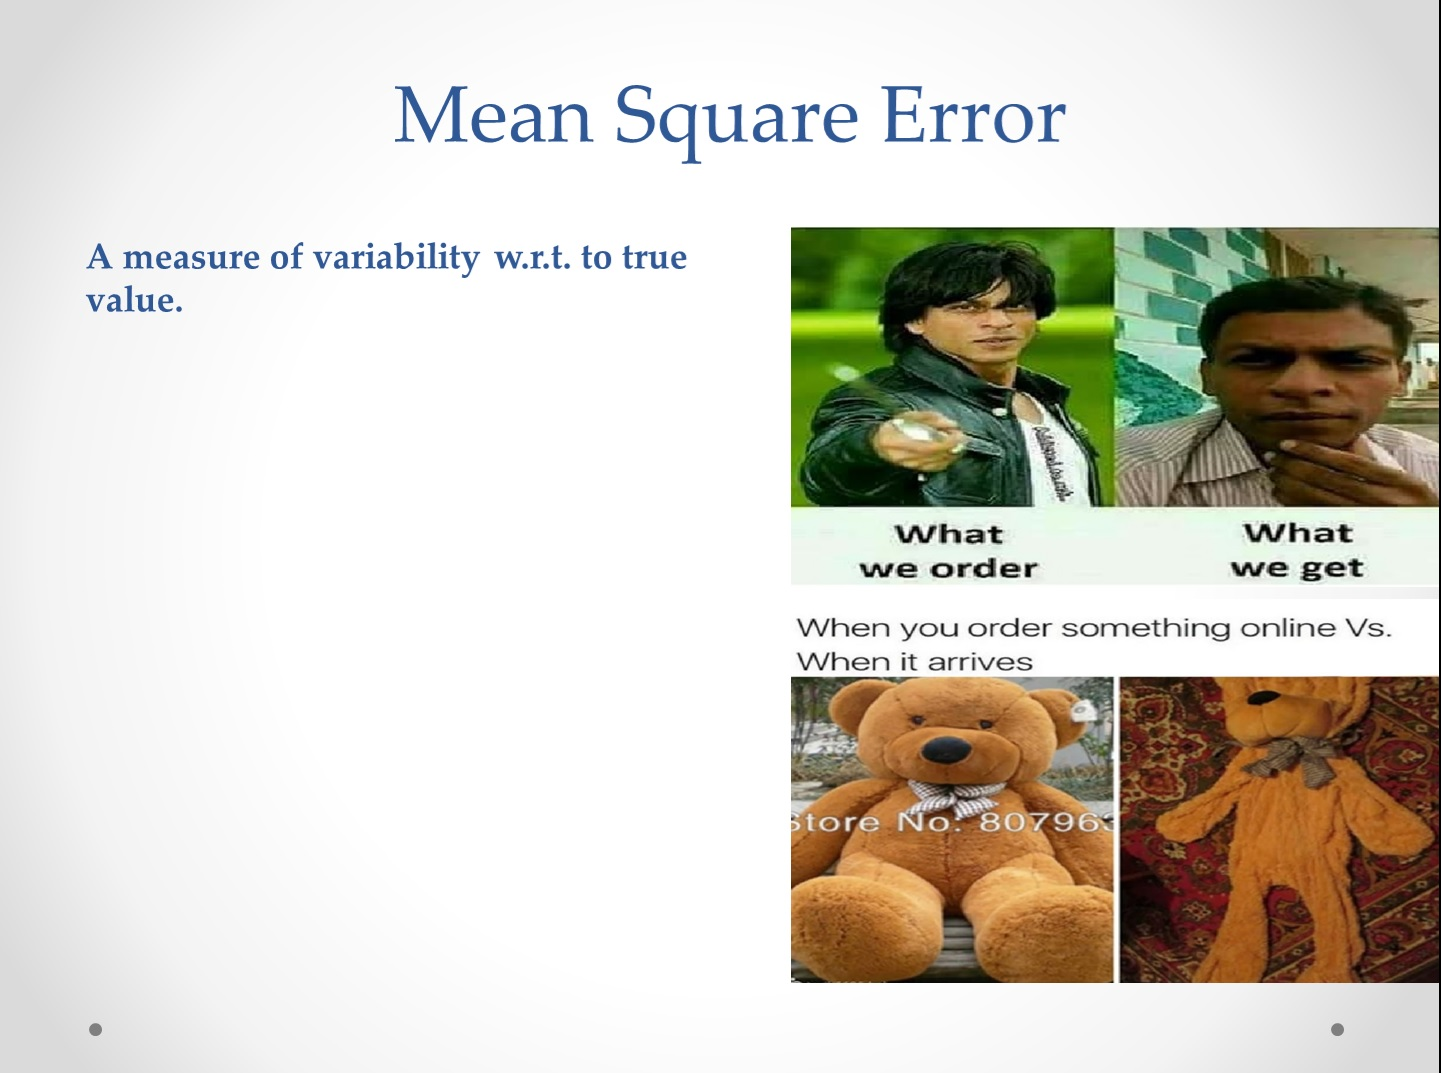

## Confidence Interval
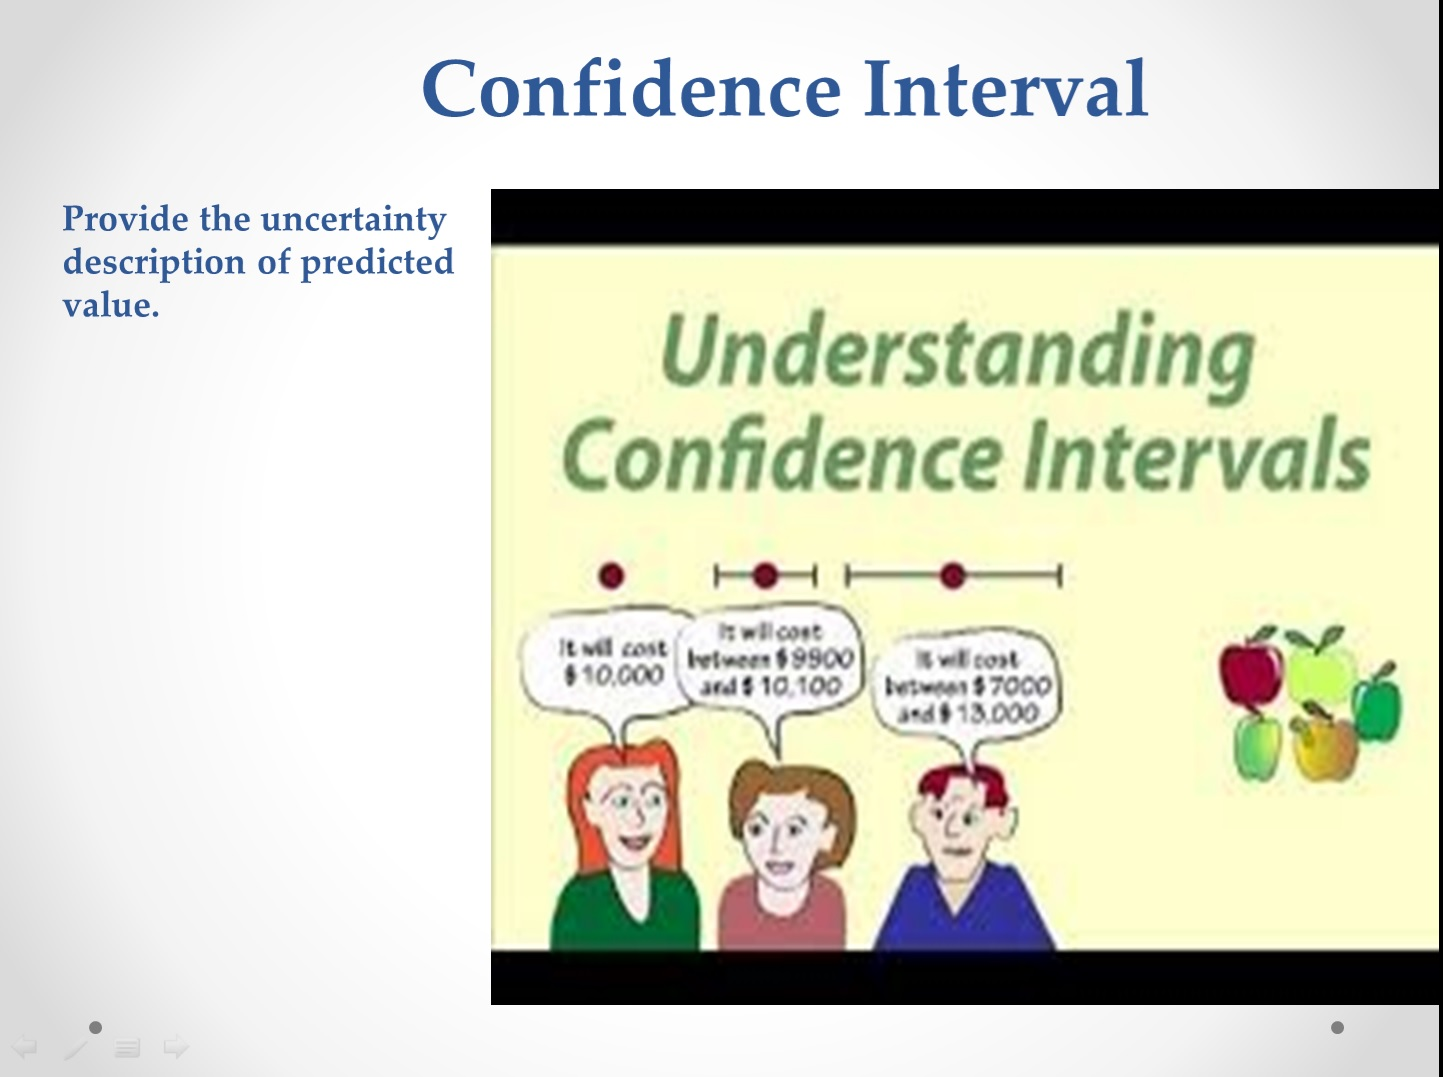

## Estimation Methods 

Maximum likelihood estimation(MLE)<br>
Least squared methods <br>
Monte carlo Methods <br>
Bayesian Methods <br>
Minimum mean squared error method

## What is MLE
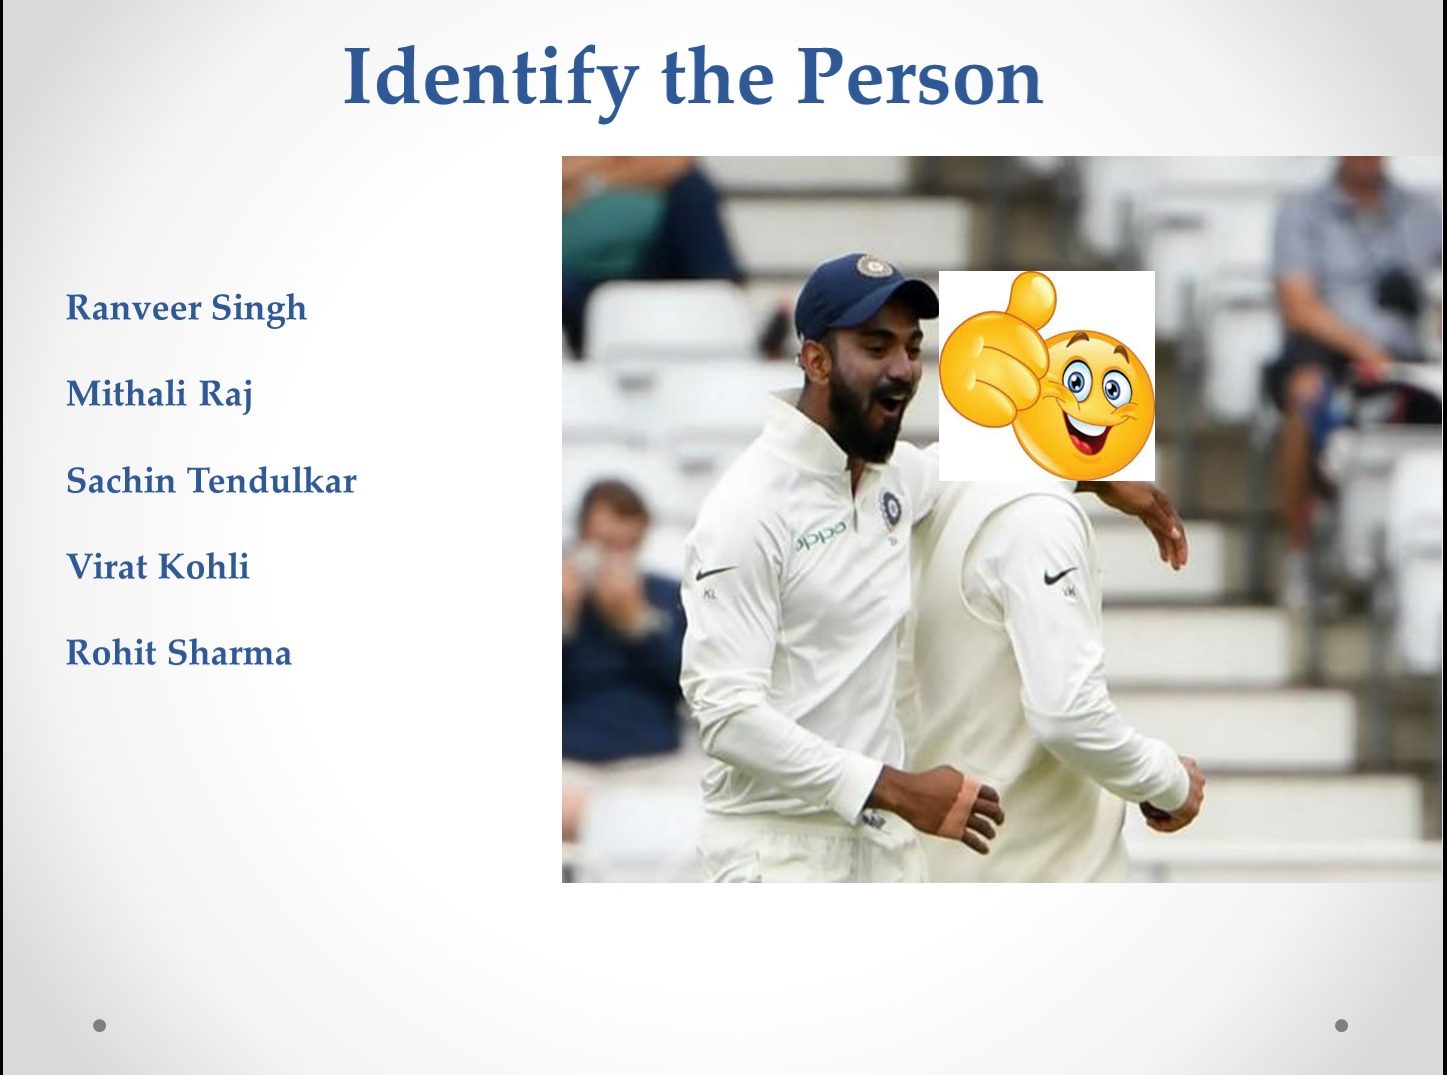


## Definition 
MLE is a technique used for estimating the parameters of a given distribution, using some observed data. For example, if a population is known to follow a Normal Distribution but the Mean and Variance are unknown, MLE can be used to estimate using a limited sample of population, by finding particular values of the mean and variance so that the observations is the most likely result to have occurred.  

In [13]:
# Lets Understand MLE with Some Examples

In [22]:
import pandas as pd
from scipy import stats
from scipy.stats import binom
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics

## Example1
A coin is flipped 100 times and 61 heads are observed. The coin either has the probability 1/3, ½ and 2/3 of flipping a head each time it is flipped. Which of three is MLE?


In [2]:
# This is binomial distribution with one parameter P.
print(stats.binom.pmf(61,100, 1/3).round(2))
print(stats.binom.pmf(61,100, 1/2).round(2))
print(stats.binom.pmf(61,100, 2/3).round(2))

0.0
0.01
0.04


### MLE is 2/3

# Example 2
A bag contains mix of red and blue balls. A ball is drawn from the box, its color is noted and then it is put back in the bag. The experiment is repeated 10 times.

Following is the result. <br> Red  Red  Red  Red  Blue  Red  Red  Blue  Blue Red

Which of the population do you think the ball were drawn from ? <br>10% Red and 90% Blue<br>30% Red and 70% Blue<br>50% Red and 50% Blue<br>70% Red and 30% Blue<br>90% Red and 10% Blue



# Solution
#### suppose the proportion of Red ball is x and blue ball is 1-x <br>  P = x * x * x * x * (1-x) * x * x * (1-x) * (1-x) * x <br> = x^7 * (1-x)^3

In [3]:
print("when x = 0.1 then p =" ,0.1**7*(1-0.1)**3)
print("when x = 0.3 then p =" ,0.3**7*(1-0.3)**3)
print("when x = 0.5 then p =" ,0.5**7*(1-0.5)**3)
print("when x = 0.7 then p =" ,0.7**7*(1-0.7)**3)
print("when x = 0.9 then p =" ,0.9**7*(1-0.9)**3)

when x = 0.1 then p = 7.290000000000004e-08
when x = 0.3 then p = 7.501409999999996e-05
when x = 0.5 then p = 0.0009765625
when x = 0.7 then p = 0.0022235661
when x = 0.9 then p = 0.0004782968999999998


## Lets take the example of Normal Distribution
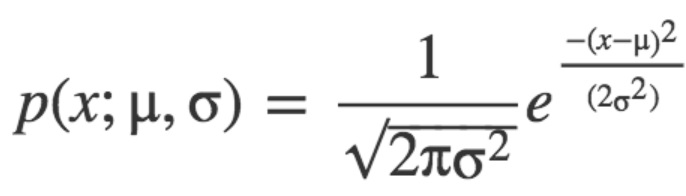

## Example 3: <br>
#### - Lets say our sample is 3, what is the probability is comes from a distribtution of mean = 3 and sd = 1?
#### - Lets say it came from a distribution of mean = 7 and sd = 2?

In [4]:
print(norm.pdf(3, 3,1)) # Mean = 3 and Sd = 1
print(norm.pdf(3,7,2))  # Mean = 7 & sd = 2

0.3989422804014327
0.02699548325659403


##### we can see that it is much more likely to come from first distribution. 



## Example 4:
### Lets say we get two samples which we know that has come from Normal distribution and are mutually independent from each other. In this case the probability of observing the data is the product of obtaining each data point individually.

### so if we want to see the probability of 2 and 6 are drawn from the distribution mean = 4, sd = 1



In [5]:
norm.pdf(2,4,1)*norm.pdf(6,4,1) # Product of probability of two independent events

0.0029150244650281948


## Example 5:
#####  Lets take an example of  many samples where x = [2, 3, 4, 5, 7, 8, 9, 10] and compare theses values to both PDF(mean = 5, sd = 3) and PDF(mean = 7 and sd = 3)

In [6]:
print(norm.pdf(2,5,3)*norm.pdf(3,5,3)*norm.pdf(4,5,3)*norm.pdf(5,5,3)*norm.pdf(7,5,3)*norm.pdf(8,5,3)*norm.pdf(9,5,3)*norm.pdf(10,5,3))
print(norm.pdf(2,7,3)*norm.pdf(3,7,3)*norm.pdf(4,7,3)*norm.pdf(5,7,3)*norm.pdf(7,7,3)*norm.pdf(8,7,3)*norm.pdf(9,7,3)*norm.pdf(10,7,3))

2.236878761640028e-09
2.2368787616400275e-09


Both the probabilities are similar and this can be seen that our samples can come from either the distributions. But which one is the correct?

So we need to find the probabilities of these samples come from a normal distribtuion which we can calculate using normal distribtuion formula by just plug in the mean and SD. But we need to estimate mean and SD as well as they are not given.

We will solve this using MLE.

In [7]:
# Samples
x = [4, 5, 7, 8, 8, 9, 10, 5, 2, 3, 5, 4, 8, 9]

In [8]:
# Lets compare the likelihood of the random samples to the two distributions
def compare_data_to_dist(x, mu_1=5, mu_2=7, sd_1=3, sd_2=3):
    ll_1 = 0
    ll_2 = 0
    for i in x:
        ll_1 += np.log(norm.pdf(i, mu_1, sd_1))
        ll_2 += np.log(norm.pdf(i, mu_2, sd_2))
    
    print ("The LL of of x for mu = %d and sd = %d is: %.4f" % (mu_1, sd_1, ll_1))
    print ("The LL of of x for mu = %d and sd = %d is: %.4f" % (mu_2, sd_2, ll_2))
compare_data_to_dist(x)

The LL of of x for mu = 5 and sd = 3 is: -33.9679
The LL of of x for mu = 7 and sd = 3 is: -33.3013


In [9]:
# Now lets try different values of mean and SD
mu_set = np.linspace(0, 16, 1000) # generate multiple values for mean
sd_set = [.5, 1, 1.5, 2.5, 3, 3.5] # multiple values for standard deviation

df = pd.DataFrame()
for i in sd_set:
    
    for j in mu_set:
        b=0
        for k in x:
            b += np.log(norm.pdf(k,j,i))
            
        data = pd.DataFrame({"sd":i,
                                "mean":j,
                                "LL":b},index=[0])
        #print(data)
        df = pd.concat([df,data], axis=0)


In [25]:
df

,sd,mean,LL
0,0.5,0.000000,-1249.161079
0,0.5,0.016016,-1243.594688
0,0.5,0.032032,-1238.042661
0,0.5,0.048048,-1232.504999
0,0.5,0.064064,-1226.981702
0,0.5,0.080080,-1221.472770
0,0.5,0.096096,-1215.978202
0,0.5,0.112112,-1210.497999
0,0.5,0.128128,-1205.032161
0,0.5,0.144144,-1199.580688


In [10]:
new_df = df[df["LL"].isin(df.groupby(['sd'])['LL'].max())]
new_df

,sd,mean,LL
0,0.5,6.214214,-167.875365
0,1.0,6.214214,-54.043711
0,1.5,6.214214,-36.843238
0,2.5,6.214214,-32.281781
0,3.0,6.214214,-32.821108
0,3.5,6.214214,-33.765337


In [24]:
# Lets check the mean and Sd of sample
print("sample mean",sum(x)/len(x))
print("sample SD", statistics.stdev(x))

sample mean 6.214285714285714
sample SD 2.5169753346357675
